## Introdução

O dataset que escolhemos foi “Suicide Rates Overview 1985 to 2016” e o nosso
objetivo é observar como os atributos presentes neste dataset e as relações entre eles têm
impacto no atributo suicides_no (número de suicídios). Assim, para efetuar esta análise,
usamos o ambiente miniconda.

In [592]:
'''import libraries'''
import sklearn as skl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

## Análise dos dados


### Descrição dos atributos
De forma a perceber a melhor forma de abordar o problema, começamos por
analisar as features do dataset, Assim, podemos verificar que o dataset é composto pelos
seguintes atributos:
* **country**: variável do tipo string que identifica o país analisado.
* **year**: variável do tipo int que representa o ano correspondente ao levantamento dos dados.
* **sex**: variável do tipo string que define o sexo das pessoas que cometeram suicídio.
* **age**: variável do tipo string que representa a faixa etária dos individuos que cometeram suicídio.
* **suicides_no**: variável do tipo int que corresponde ao número de suicídios ocorridos.
* **population**: variável do tipo int que define a população de um determinado país num determinado ano.
* **suicides/100k pop**: variável do tipo double que corresponde ao número de suicídios por cada 100 mil habitantes .
* **country-year**: variável do tipo string que representa o país e o ano correspondente ao levantamento de dados .
* **HDI for year**: variável do tipo double que corresponde ao índice de desenvolvimento humano.
* **gdp_for_year**: variável do tipo string que representa o grau de desenvolvimento de um país num determinado ano
* **gdp_per_capita**: variável do tipo inteiro que representa o grau de desenvolvimento de um país per capita.
* **generation**: variável do tipo string que representa a geração do conjunto de pessoas que cometeram suicidio.



In [593]:
'''Load CSV'''
df = pd.read_csv('master.csv')

In [594]:
''''''
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [595]:
df.tail()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27819,Uzbekistan,2014,female,55-74 years,21,1438935,1.46,Uzbekistan2014,0.675,"63,067,077,179",2309,Boomers


In [596]:
df.info()
#Descreve os tipos dos respetivos atributos e conta o número de valores não NULL

#Como podemos observar no output apenas 8364 das 27820 não são valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [597]:
print(df.isna().sum())
# Tal como em cima confirmamos aqui verificamos 19456 entradas nulas 
# no atributo 'HDI for year'

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64


In [598]:
# Contar o número de registos repetidos
print(df['country'].duplicated().sum())

27719


In [599]:
df['HDI for year'].value_counts()

HDI for year
0.772    84
0.713    84
0.888    84
0.830    72
0.761    72
         ..
0.696    12
0.894    12
0.893    12
0.770    12
0.675    12
Name: count, Length: 305, dtype: int64

In [600]:
df['HDI for year'].describe()

count    8364.000000
mean        0.776601
std         0.093367
min         0.483000
25%         0.713000
50%         0.779000
75%         0.855000
max         0.944000
Name: HDI for year, dtype: float64

Axes(0.125,0.11;0.775x0.77)


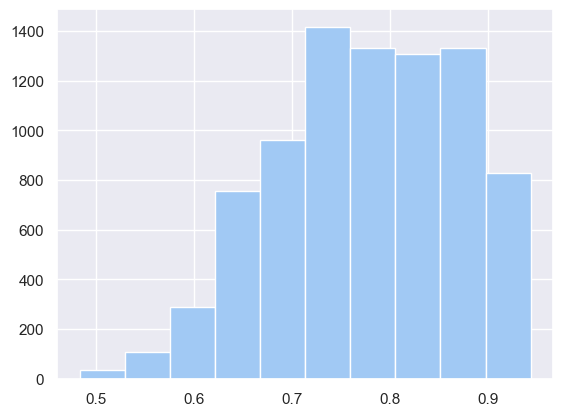

In [601]:
print(df['HDI for year'].hist())

<Axes: >

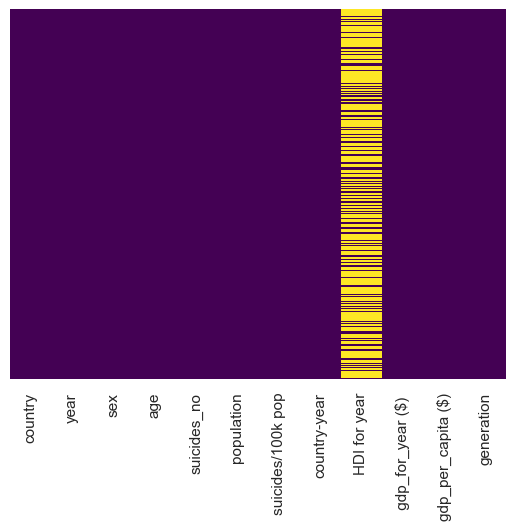

In [602]:
sns.heatmap(df.isnull(), yticklabels=False,cbar=False,cmap='viridis')


In [603]:
print(f"Skewness: {df['HDI for year'].skew()}")
print(f"Kurtosis: {df['HDI for year'].kurt()}")

Skewness: -0.30087744889575646
Kurtosis: -0.6479139271723233


"\ncountry', 'year', 'sex', 'age', 'suicides_no', 'population',\n       'suicides/100k pop', 'country-year', 'HDI for year',\n       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'\n"

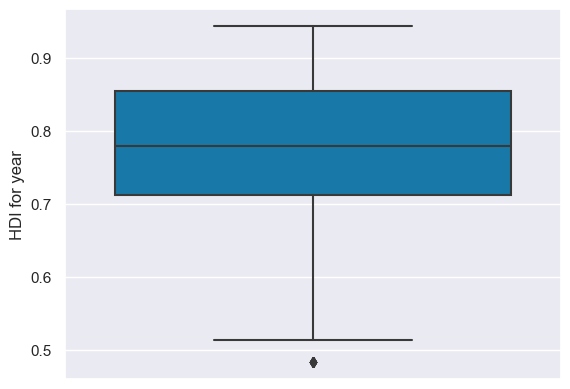

In [604]:
sns.boxplot(y='HDI for year',data=df,palette='winter')

'''
country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'
'''

In [605]:
#df['HDI for year'] = df['HDI for year'].fillna(df['HDI for year'].mean())

In [606]:
#print(df['HDI for year'].hist())

In [607]:

'''
Rename complicated columns' names
'''  
df.rename(columns={" gdp_for_year ($) ": "gdp_for_year"}, inplace=True)
df.rename(columns={"gdp_per_capita ($)": "gdp_per_capita"}, inplace=True)
df.columns


Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year', 'gdp_for_year',
       'gdp_per_capita', 'generation'],
      dtype='object')

In [608]:
'''
Remove , from the featur gdp_for_year
'''
df["gdp_for_year"] = df["gdp_for_year"].replace(",", "", regex=True)


In [609]:
'''
Convert gdp_for_year type from string to number
'''
df["gdp_for_year"] = df["gdp_for_year"].astype("int64")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            27820 non-null  object 
 1   year               27820 non-null  int64  
 2   sex                27820 non-null  object 
 3   age                27820 non-null  object 
 4   suicides_no        27820 non-null  int64  
 5   population         27820 non-null  int64  
 6   suicides/100k pop  27820 non-null  float64
 7   country-year       27820 non-null  object 
 8   HDI for year       8364 non-null   float64
 9   gdp_for_year       27820 non-null  int64  
 10  gdp_per_capita     27820 non-null  int64  
 11  generation         27820 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.5+ MB


In [610]:
"""
Replace each country with a number
"""

country_to_number = {}
unique_countries = df['country'].unique()

for i in range(len(unique_countries)):
    country_to_number[unique_countries[i]] = i + 1

# Adicione a coluna "country(to number)" ao DataFrame usando o mapeamento
df['country(to number)'] = df['country'].map(country_to_number)

# Exiba o DataFrame resultante
print(df)


          country  year     sex          age  suicides_no  population  \
0         Albania  1987    male  15-24 years           21      312900   
1         Albania  1987    male  35-54 years           16      308000   
2         Albania  1987  female  15-24 years           14      289700   
3         Albania  1987    male    75+ years            1       21800   
4         Albania  1987    male  25-34 years            9      274300   
...           ...   ...     ...          ...          ...         ...   
27815  Uzbekistan  2014  female  35-54 years          107     3620833   
27816  Uzbekistan  2014  female    75+ years            9      348465   
27817  Uzbekistan  2014    male   5-14 years           60     2762158   
27818  Uzbekistan  2014  female   5-14 years           44     2631600   
27819  Uzbekistan  2014  female  55-74 years           21     1438935   

       suicides/100k pop    country-year  HDI for year  gdp_for_year  \
0                   6.71     Albania1987           

In [611]:
"""
Remove as colunas country-year e country
"""
df = df.drop(['country-year','country'], axis=1)
df.columns

Index(['year', 'sex', 'age', 'suicides_no', 'population', 'suicides/100k pop',
       'HDI for year', 'gdp_for_year', 'gdp_per_capita', 'generation',
       'country(to number)'],
      dtype='object')

## Treino de um Modelo de Regressão Linear

In [612]:
#Fazer cópia
df_copy1 = df.copy()

In [613]:
''' 
Eliminar as linhas com missing values na coluna "HDI for year"
'''
df_copy1 = df_copy1.dropna()
df_copy1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8364 entries, 72 to 27819
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                8364 non-null   int64  
 1   sex                 8364 non-null   object 
 2   age                 8364 non-null   object 
 3   suicides_no         8364 non-null   int64  
 4   population          8364 non-null   int64  
 5   suicides/100k pop   8364 non-null   float64
 6   HDI for year        8364 non-null   float64
 7   gdp_for_year        8364 non-null   int64  
 8   gdp_per_capita      8364 non-null   int64  
 9   generation          8364 non-null   object 
 10  country(to number)  8364 non-null   int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 784.1+ KB


In [614]:
X1 = df_copy1[['year','suicides/100k pop','HDI for year','gdp_for_year','gdp_per_capita','country(to number)']]
y1 = df_copy1['suicides_no']

### Separação dos dados de teste

In [615]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1, test_size=0.4, random_state=2023)
#X_train = X_train.drop(['sex','age','population','generation'],axis=1)
#X_test = X_test.drop(['sex','age','population','generation'],axis=1)

### Criação e treino do Modelo

In [616]:
#Treino
lm = LinearRegression()

In [617]:
lm.fit(X1_train,y1_train)

LinearRegression()

### Avaliação do Modelo

In [618]:
print(lm.intercept_)

6664.834410859599


In [619]:
predictions1 = lm.predict(X1_test)

In [620]:
print("MAE:", metrics.mean_absolute_error(y1_test,predictions1))
print("MSE:", metrics.mean_squared_error(y1_test,predictions1))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y1_test,predictions1)))
print("R2:",r2_score(y1_test, predictions1))

MAE: 181.58345764814206
MSE: 267319.8177231188
RMSE: 517.0298035153475
R2: 0.4575121869837627


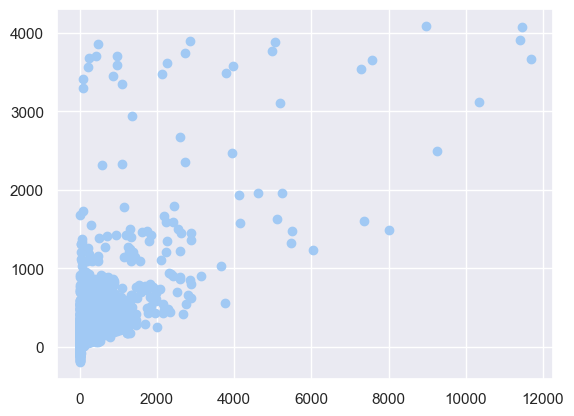

In [621]:
plt.scatter(y1_test,predictions1)

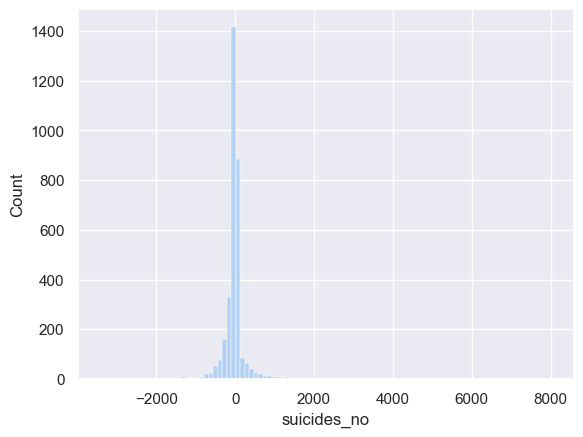

In [622]:
sns.histplot((y1_test-predictions1),bins=100);

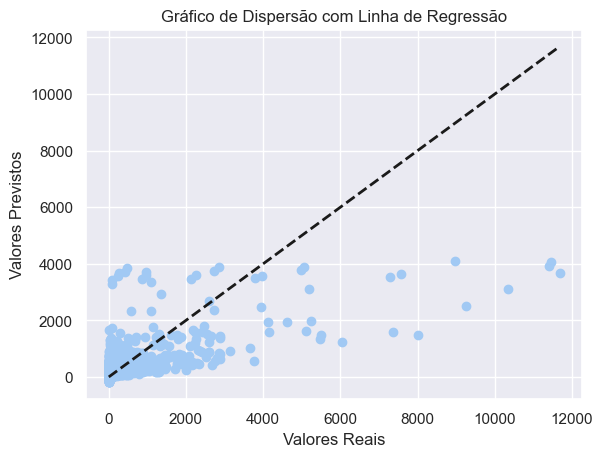

In [623]:
# Gráfico de dispersão com linha de regressão
plt.scatter(y1_test, predictions1)
plt.xlabel("Valores Reais")
plt.ylabel("Valores Previstos")
plt.title("Gráfico de Dispersão com Linha de Regressão")
plt.plot([y1_test.min(), y1_test.max()], [y1_test.min(), y1_test.max()], '--k', linewidth=2)  # Linha de 45 graus
plt.show()

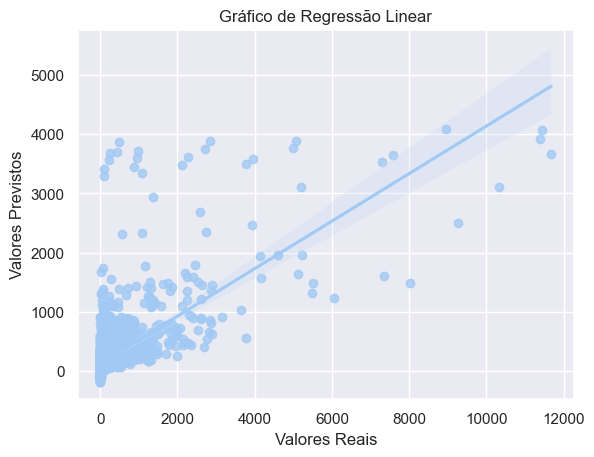

In [624]:
# Gráfico de regressão linear
sns.regplot(x=y1_test, y=predictions1)
plt.xlabel("Valores Reais")
plt.ylabel("Valores Previstos")
plt.title("Gráfico de Regressão Linear")
plt.show()

## Treino de um Modelo de Regressão Linear

In [625]:
#Fazer cópia
df_copy2 = df.copy()

In [626]:
'''
Remover a coluna com os missing values
'''
df_copy2 = df_copy2.drop("HDI for year",axis=1)
df_copy2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                27820 non-null  int64  
 1   sex                 27820 non-null  object 
 2   age                 27820 non-null  object 
 3   suicides_no         27820 non-null  int64  
 4   population          27820 non-null  int64  
 5   suicides/100k pop   27820 non-null  float64
 6   gdp_for_year        27820 non-null  int64  
 7   gdp_per_capita      27820 non-null  int64  
 8   generation          27820 non-null  object 
 9   country(to number)  27820 non-null  int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 2.1+ MB


In [627]:
X2 = df_copy2[['year','suicides/100k pop','gdp_for_year','gdp_per_capita','country(to number)']]
y2 = df_copy2['suicides_no']

### Separação dos dados de teste

In [628]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2, test_size=0.4, random_state=2023)

### Criação e treino do Modelo

In [629]:
#Treino
lm = LinearRegression()

In [630]:
lm.fit(X2_train,y2_train)

LinearRegression()

### Avaliação do Modelo

In [631]:
print(lm.intercept_)

1889.7882460747335


In [632]:
predictions2 = lm.predict(X2_test)

### Evaluation

In [633]:
print("MAE:", metrics.mean_absolute_error(y2_test,predictions2))
print("MSE:", metrics.mean_squared_error(y2_test,predictions2))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y2_test,predictions2)))
print("R2:",r2_score(y2_test, predictions2))

MAE: 247.2965147444225
MSE: 479929.75994145055
RMSE: 692.7696297770642
R2: 0.2709474761375342


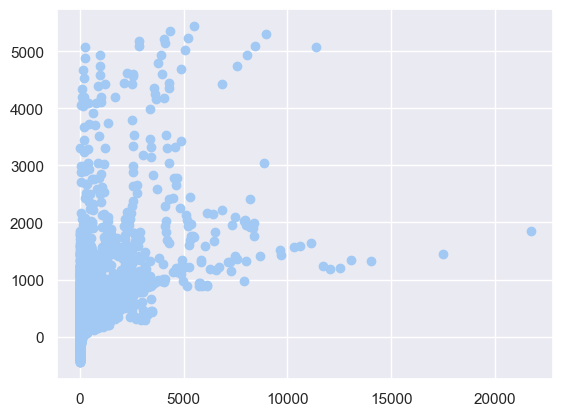

In [634]:
plt.scatter(y2_test,predictions2)

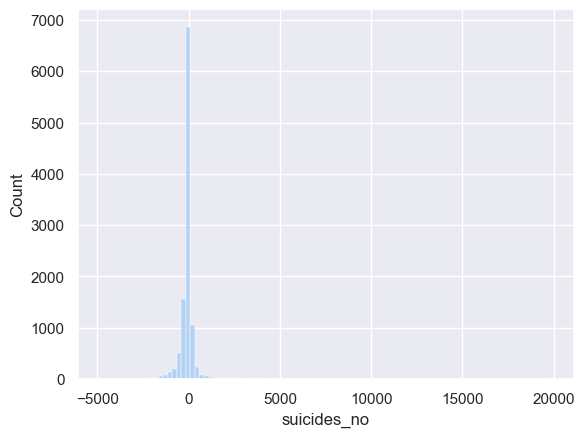

In [635]:
sns.histplot((y2_test-predictions2),bins=100);

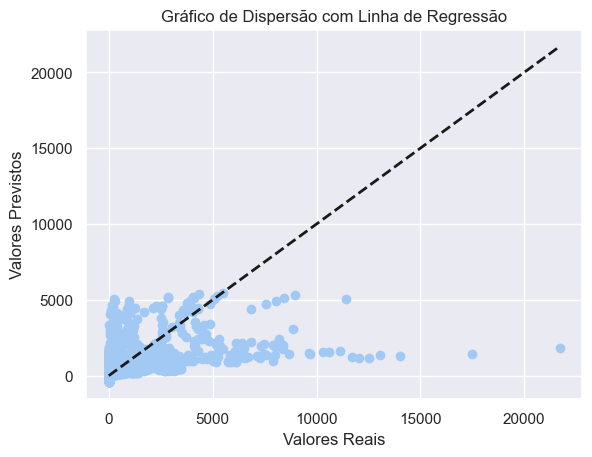

In [636]:
# Gráfico de dispersão com linha de regressão
plt.scatter(y2_test, predictions2)
plt.xlabel("Valores Reais")
plt.ylabel("Valores Previstos")
plt.title("Gráfico de Dispersão com Linha de Regressão")
plt.plot([y2_test.min(), y2_test.max()], [y2_test.min(), y2_test.max()], '--k', linewidth=2)  # Linha de 45 graus
plt.show()

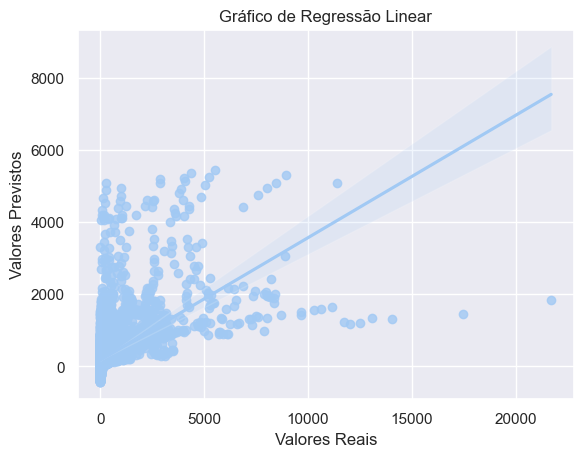

In [637]:
# Gráfico de regressão linear
sns.regplot(x=y2_test, y=predictions2)
plt.xlabel("Valores Reais")
plt.ylabel("Valores Previstos")
plt.title("Gráfico de Regressão Linear")
plt.show()

## Tratamento Outliers

In [638]:
#Cópia do datset df
df_copy2 = df.copy()
df_copy2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                27820 non-null  int64  
 1   sex                 27820 non-null  object 
 2   age                 27820 non-null  object 
 3   suicides_no         27820 non-null  int64  
 4   population          27820 non-null  int64  
 5   suicides/100k pop   27820 non-null  float64
 6   HDI for year        8364 non-null   float64
 7   gdp_for_year        27820 non-null  int64  
 8   gdp_per_capita      27820 non-null  int64  
 9   generation          27820 non-null  object 
 10  country(to number)  27820 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 2.3+ MB


In [639]:
# Eliminar a coluna "HDI for year"
df_copy2 = df_copy2.dropna()
# Eliminar a coluna "gdp_per_capita" porque contém outliers
#df_copy2 = df_copy2.drop("gdp_per_capita",axis=1)
df_copy2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8364 entries, 72 to 27819
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                8364 non-null   int64  
 1   sex                 8364 non-null   object 
 2   age                 8364 non-null   object 
 3   suicides_no         8364 non-null   int64  
 4   population          8364 non-null   int64  
 5   suicides/100k pop   8364 non-null   float64
 6   HDI for year        8364 non-null   float64
 7   gdp_for_year        8364 non-null   int64  
 8   gdp_per_capita      8364 non-null   int64  
 9   generation          8364 non-null   object 
 10  country(to number)  8364 non-null   int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 784.1+ KB


Axes(0.125,0.11;0.775x0.77)


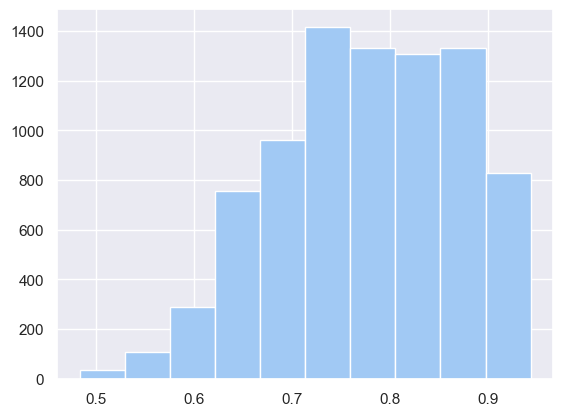

In [640]:
print(df['HDI for year'].hist())

<Axes: >

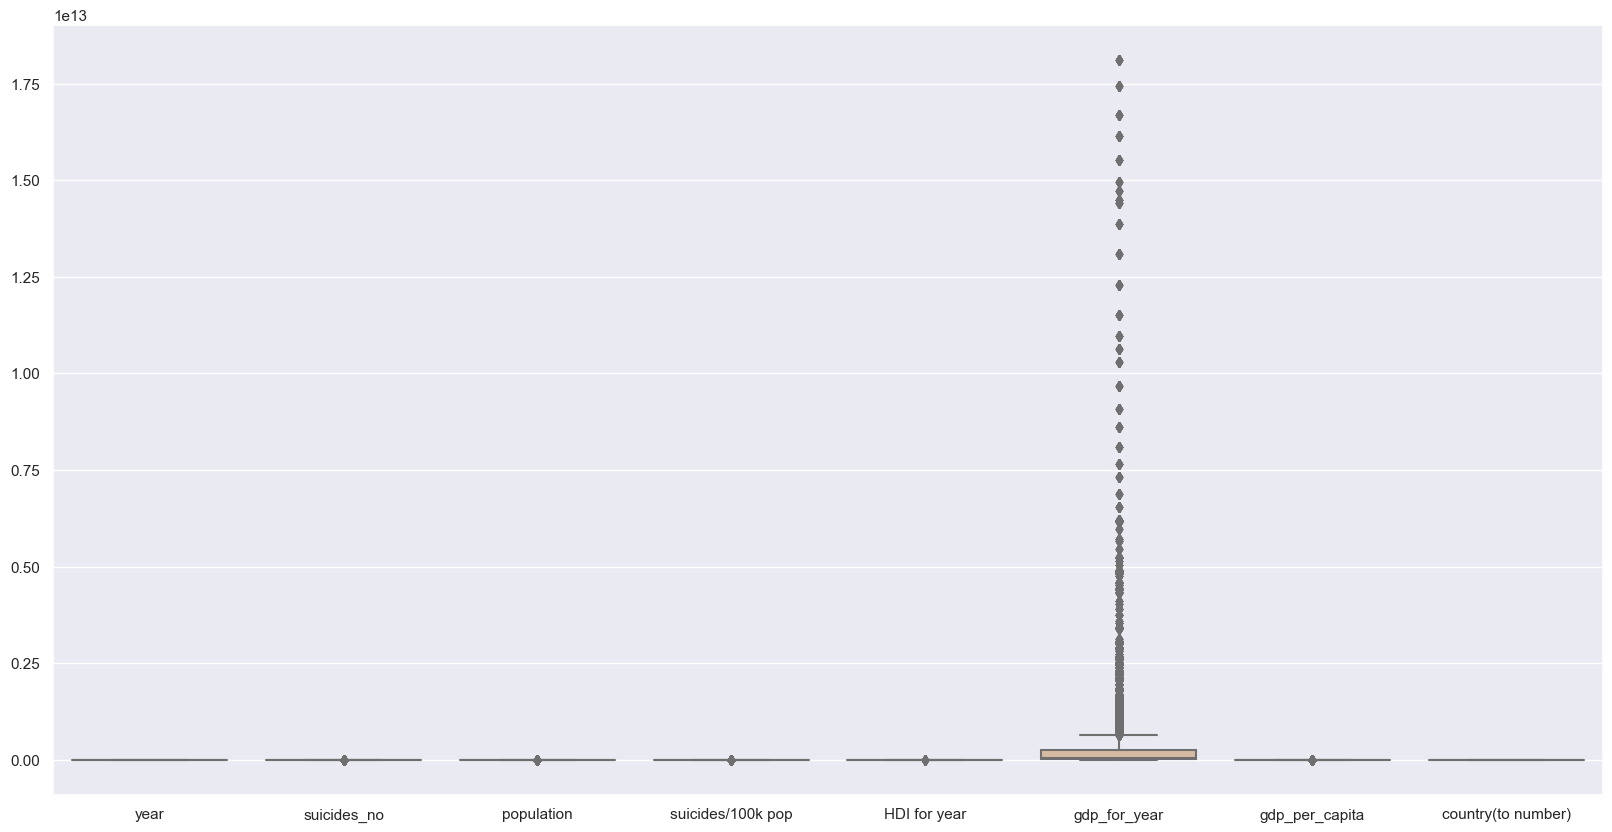

In [641]:
"""
Tratamento dos Outliers
"""

# Outliers boxplot
sns.set_theme(palette="pastel")
plt.subplots(figsize=(20,10))

sns.boxplot(data=df)

## Clustering

## Redes Neuronais